In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("cluster_june.xlsx")

In [3]:
df

,Test,Frequency,Avg_revenue
0,Complete Blood Count,673,251.726597
1,Random Blood Sugar,445,38.703371
2,Urine Routine,388,77.925258
3,Thyroid Stimulating,289,232.290657
4,Renal Function Test (RFT),288,134.579861
...,...,...,...
133,Troponin T,1,1000.000000
134,HBs Ag Elisa / Clia,1,900.000000
135,Cortisol Serum 8AM,1,700.000000
136,24 Hrs Urine Protein,1,200.000000


In [4]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df

,Test,Frequency,Avg_revenue
0,Complete Blood Count,673,251.726597
1,Random Blood Sugar,445,38.703371
2,Urine Routine,388,77.925258
3,Thyroid Stimulating,289,232.290657
4,Renal Function Test (RFT),288,134.579861
...,...,...,...
133,Troponin T,1,1000.000000
134,HBs Ag Elisa / Clia,1,900.000000
135,Cortisol Serum 8AM,1,700.000000
136,24 Hrs Urine Protein,1,200.000000


## Plotting on scatter plot the 2 features of each test

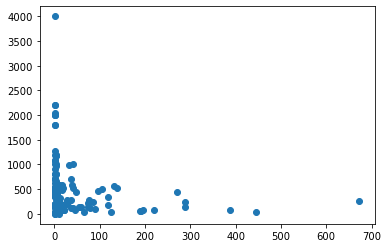

In [7]:
plt.scatter(df['Frequency'],df['Avg_revenue'])

In [8]:
scaler = MinMaxScaler()
df[['Frequency']]=scaler.fit_transform(df[['Frequency']])
df[['Avg_revenue']]=scaler.fit_transform(df[['Avg_revenue']])
df

,Test,Frequency,Avg_revenue
0,Complete Blood Count,1.000000,0.062932
1,Random Blood Sugar,0.660714,0.009676
2,Urine Routine,0.575893,0.019481
3,Thyroid Stimulating,0.428571,0.058073
4,Renal Function Test (RFT),0.427083,0.033645
...,...,...,...
133,Troponin T,0.000000,0.250000
134,HBs Ag Elisa / Clia,0.000000,0.225000
135,Cortisol Serum 8AM,0.000000,0.175000
136,24 Hrs Urine Protein,0.000000,0.050000


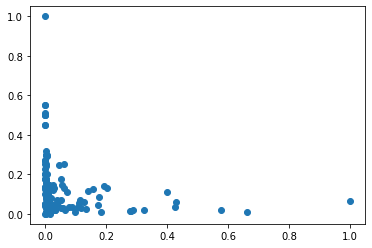

In [9]:
plt.scatter(df['Frequency'],df['Avg_revenue'])


## Finding optimum Value of k-number of clusters

In [11]:
k_rng= range(1,11)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(df[['Frequency','Avg_revenue']])
    sse.append(km.inertia_)

In [12]:
sse

[5.34612395960798,
 3.4725414653666165,
 1.7209868155642303,
 1.202233058530567,
 0.8269455240068653,
 0.6630522119430078,
 0.44976455402987287,
 0.3044282218929687,
 0.21082963500030905,
 0.1779836035757807]

Text(0, 0.5, 'Sum squared error')

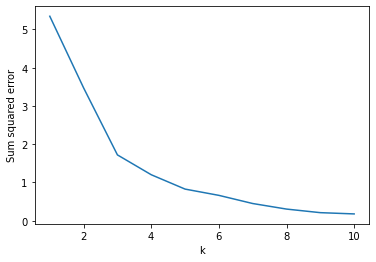

In [13]:
plt.plot(k_rng,sse)
plt.xlabel('k')
plt.ylabel('Sum squared error')

## K= 5 is selected as optimum value of cluster numbers using elow-joint analysis

In [14]:

km = KMeans(n_clusters=5)
km


KMeans(n_clusters=5)

In [15]:
y_predicted= km.fit_predict(df[['Frequency','Avg_revenue']])
y_predicted

array([4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0,
       0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 0, 2, 2, 0, 3, 0, 2, 3, 0, 2, 2, 2, 0, 3, 3, 2, 2, 3,
       2, 0, 0, 0, 3, 3])

In [16]:

df['cluster']=y_predicted
df

,Test,Frequency,Avg_revenue,cluster
0,Complete Blood Count,1.000000,0.062932,4
1,Random Blood Sugar,0.660714,0.009676,4
2,Urine Routine,0.575893,0.019481,4
3,Thyroid Stimulating,0.428571,0.058073,1
4,Renal Function Test (RFT),0.427083,0.033645,1
...,...,...,...,...
133,Troponin T,0.000000,0.250000,0
134,HBs Ag Elisa / Clia,0.000000,0.225000,0
135,Cortisol Serum 8AM,0.000000,0.175000,0
136,24 Hrs Urine Protein,0.000000,0.050000,3


In [17]:
df0= df[df['cluster']==0]
df1= df[df['cluster']==1]
df2= df[df['cluster']==2]
df3= df[df['cluster']==3]
df4= df[df['cluster']==4]


In [18]:
df0

,Test,Frequency,Avg_revenue,cluster
28,Biopsy Histopathology,0.059524,0.251543,0
31,PUS Culture,0.055060,0.144763,0
33,Blood Culture,0.052083,0.178993,0
35,"Troponin I (High Sensitive,",0.046131,0.247266,0
48,Dengue IgG IgM NS1,0.023810,0.146265,0
55,Serum Amylase,0.013393,0.148125,0
58,Serum Lipase,0.011905,0.147917,0
72,Prostate Specific Antigen,0.005952,0.148500,0
75,Anti Phospholipid Antibody,0.004464,0.200000,0
77,Beta HCG,0.004464,0.148063,0


In [19]:
df1

,Test,Frequency,Avg_revenue,cluster
3,Thyroid Stimulating,0.428571,0.058073,1
4,Renal Function Test (RFT),0.427083,0.033645,1
5,"Electrolytes (Na,K,Cl)",0.400298,0.109237,1
6,Serum Creatinine,0.324405,0.019193,1
7,Haemoglobin (HB),0.288690,0.019221,1
8,Blood Group & RH Factor,0.281250,0.014611,1
9,OP GRBS,0.278274,0.017281,1
10,Liver Function Test (LFT),0.203869,0.131486,1
11,ABG (Arterial Blood Gas),0.193452,0.140763,1
12,Fasting Blood Sugar (FBS),0.183036,0.009712,1


In [20]:
df2

,Test,Frequency,Avg_revenue,cluster
115,NTPro BNP,0.0,0.5000,2
116,Anti CCP- (Cyclic,0.0,0.5000,2
120,Hepatitis E Virus Antibody,0.0,0.4500,2
123,Double Marker For Downs,0.0,0.5000,2
124,ANA Profile,0.0,1.0000,2
125,Amh-Mullerian Inhibiting,0.0,0.4500,2
129,Triple Marker,0.0,0.5500,2
130,Calcitonin,0.0,0.5105,2
132,Vitamin B12,0.0,0.5500,2


In [21]:
df3

,Test,Frequency,Avg_revenue,cluster
16,Urine Culture,0.141369,0.116349,3
17,Glucose Challenge Test,0.132440,0.024036,3
18,Serum Bilirubin,0.126488,0.059718,3
19,Platelet Count,0.116071,0.028231,3
20,CRP -Slide Latex,0.113095,0.072377,3
...,...,...,...,...
127,Triglycerides,0.000000,0.050000,3
128,Cross Matching,0.000000,0.000000,3
131,Acid Phosphatase,0.000000,0.125000,3
136,24 Hrs Urine Protein,0.000000,0.050000,3


In [22]:
df4

,Test,Frequency,Avg_revenue,cluster
0,Complete Blood Count,1.000000,0.062932,4
1,Random Blood Sugar,0.660714,0.009676,4
2,Urine Routine,0.575893,0.019481,4


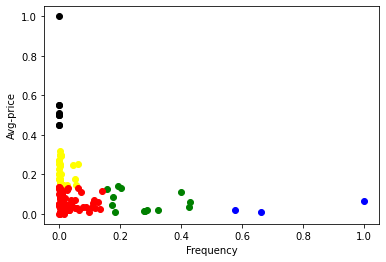

<Figure size 1440x1080 with 0 Axes>

In [23]:
plt.scatter(df0['Frequency'],df0['Avg_revenue'],color='yellow')
plt.scatter(df1['Frequency'],df1['Avg_revenue'],color='green')
plt.scatter(df2['Frequency'],df2['Avg_revenue'],color='black')
plt.scatter(df3['Frequency'],df3['Avg_revenue'],color='red')
plt.scatter(df4['Frequency'],df4['Avg_revenue'],color='blue')
plt.xlabel('Frequency')
plt.ylabel('Avg-price')
fig= plt.figure(figsize=(20,15))
plt.show()